# Exploring the Bay Wheels Trip Data Set.
## by Howard Waldstreicher

## Exploring the Trip Data Set with visualizations

**Bay Wheels is a bike share for anyone in the Bay Area that is affordable, accessible and a fun transportation option**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Load the dataset

In [2]:
#file to read in
file = '201912-baywheels-tripdata.csv'
#read in dataset which is a csv file 
df_bike = pd.read_csv(file,low_memory=False)

#look at memory usage
df_bike.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
duration_sec               150102 non-null int64
start_time                 150102 non-null object
end_time                   150102 non-null object
start_station_id           129083 non-null float64
start_station_name         129087 non-null object
start_station_latitude     150102 non-null float64
start_station_longitude    150102 non-null float64
end_station_id             128755 non-null float64
end_station_name           128757 non-null object
end_station_latitude       150102 non-null float64
end_station_longitude      150102 non-null float64
bike_id                    150102 non-null int64
user_type                  150102 non-null object
rental_access_method       27681 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 68.7 MB


## Structure of Data Set

In [3]:
#shape of data
df_bike.shape

(150102, 14)

In [4]:
# user types 
df_bike['user_type'].value_counts()

Subscriber    78233
Customer      71869
Name: user_type, dtype: int64

In [5]:
#what are types of rental access
df_bike['rental_access_method'].value_counts()

app        23994
clipper     3687
Name: rental_access_method, dtype: int64

**There are many missing rental access types, not sure why- but this is an important field. The clipper is a card for Bay Area residents and tourists (if they want to purchase when visiting) used for mass transit and now for bay wheels.** 

In [6]:
#what are the null values
df_bike.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            21019
start_station_name          21015
start_station_latitude          0
start_station_longitude         0
end_station_id              21347
end_station_name            21345
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       122421
dtype: int64

In [7]:
#statistics
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,150102.000000,129083.000000,150102.000000,150102.000000,128755.000000,150102.000000,150102.000000,150102.000000
mean,790.649752,166.216884,37.734527,-122.324810,157.234841,37.729180,-122.305736,98479.011719
std,2925.944647,139.504738,0.149011,0.167988,137.800047,0.480472,1.490201,217369.156650
min,60.000000,3.000000,37.268049,-122.513816,3.000000,0.000000,-122.513824,12.000000
25%,359.000000,52.000000,37.764802,-122.415674,38.000000,37.765026,-122.411726,9496.000000
50%,570.000000,116.000000,37.776664,-122.398279,109.000000,37.777053,-122.397086,11025.000000
75%,886.000000,266.000000,37.792251,-122.275698,252.000000,37.794130,-122.279352,12727.000000
max,912110.000000,498.000000,37.880222,-121.813425,498.000000,37.880222,0.000000,999941.000000


In [8]:
#data info
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
duration_sec               150102 non-null int64
start_time                 150102 non-null object
end_time                   150102 non-null object
start_station_id           129083 non-null float64
start_station_name         129087 non-null object
start_station_latitude     150102 non-null float64
start_station_longitude    150102 non-null float64
end_station_id             128755 non-null float64
end_station_name           128757 non-null object
end_station_latitude       150102 non-null float64
end_station_longitude      150102 non-null float64
bike_id                    150102 non-null int64
user_type                  150102 non-null object
rental_access_method       27681 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 16.0+ MB


# Some minor data wrangling is needed 

1. drop the following columns as they provide no value for analysis - start_station_id, start_station_latitude,start_station_longitude, end_station_id, end_station_latitude,end_station_longitude, and bike_id
2. replace all NaN values after dropping columns to 'NA' for not available as they are strings
3. change start_time and end_time to Date timestamps
4. add two new columns duration_less60_mins and duration_greater60_mins. .  I will drop all rows greater than 3 hours as this is the bulk of the data.


In [9]:
#make a copy of frame
df_bike_copy = df_bike.copy()

#list of columns to be dropped
col_drop=['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude',
         'end_station_longitude','bike_id']
#drop the columns not being used for analysis
df_bike_copy.drop(col_drop,axis=1,inplace=True)

#verify
df_bike_copy.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,China Basin St at 3rd St,Howard St at Mary St,Customer,NaN


In [10]:
#replace NaN values with 'NA' for not available
df_bike_copy.fillna({'start_station_name':'NA', 'end_station_name':'NA','rental_access_method':'NA'}, inplace=True)

#verify start and end station names
df_bike_copy.tail(2)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,rental_access_method
150100,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NA,NA,Subscriber,app
150101,4023,2019-12-31 19:26:48,2019-12-31 20:33:52,NA,NA,Subscriber,app


In [11]:
#verify rental_access is NA looking at first few rows
df_bike_copy.head(2)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,China Basin St at 3rd St,Howard St at Mary St,Customer,NA
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,The Embarcadero at Pier 38,Illinois St at Cesar Chavez St,Customer,NA


In [12]:
# convert start_time and end_time to date time objects
df_bike_copy['start_time']= pd.to_datetime(df_bike_copy['start_time'])
df_bike_copy['end_time']= pd.to_datetime(df_bike_copy['end_time'])

#verify
df_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 7 columns):
duration_sec            150102 non-null int64
start_time              150102 non-null datetime64[ns]
end_time                150102 non-null datetime64[ns]
start_station_name      150102 non-null object
end_station_name        150102 non-null object
user_type               150102 non-null object
rental_access_method    150102 non-null object
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 8.0+ MB


**add weekday_name column based off date timestamp - This will be useful to determine rides on weekdays**

In [13]:
#add dow(day of week) column by name
df_bike_copy['dow'] = df_bike_copy['start_time'].dt.weekday_name

#verify
df_bike_copy[['start_time','dow']].sample(5)

,start_time,dow
114919,2019-12-03 08:34:22.737,Tuesday
43817,2019-12-16 15:04:42.332,Monday
101017,2019-12-05 13:43:16.321,Thursday
110166,2019-12-04 00:40:54.540,Wednesday
129625,2019-12-23 06:59:17.000,Monday


**Now lets add a boolean column to determine if it is a weekend, possibly to be used in our analysis**

In [14]:
df_bike_copy['day'] = np.where(df_bike_copy['dow'].isin(['Sunday','Saturday']),'weekend','weekday')
#verify
df_bike_copy[['dow','day']].sample(10)

,dow,day
20983,Friday,weekday
133356,Thursday,weekday
117116,Monday,weekday
11979,Tuesday,weekday
134441,Saturday,weekend
99034,Thursday,weekday
12293,Tuesday,weekday
56131,Friday,weekday
104296,Thursday,weekday
107007,Wednesday,weekday


**Drop the rows with duration_sec greater than 10800 (3 hours)**

In [15]:
#drop the rows with duration_sec > 10800 (3 hours)
df_bike_copy = df_bike_copy.query('duration_sec <10801')

**Converting duration_secs to mins to get a cleaner look on how long people ride. Two new columns will be created duration_less60  (for rides less than 1 hour ) and duration_greater60 (for rides greater than 1 hour)  Both columns will be in minutes.  I am doing minutes instead of converting to hours because of the number of datapoints that would be created for a strict hour conversion**


In [16]:
#divide seconds by 60 to get minutes if duration_sec < 1 hour 3600 seconds and will not keep remainder by using //
#for seconds greater than 3599 populate column with 0 as these will be hour or more rides.
df_bike_copy['duration_less60_mins']=  df_bike_copy['duration_sec'].apply(lambda x: x//60 if x <3600 else 0)


#add a duration_greater60_mins column for riders riding longer than 60 minutes and will not keep remainder and put
#0 in the column if value is not >=60  minutes.
df_bike_copy['duration_greater60_mins']=  df_bike_copy['duration_sec'].apply(lambda x: x//60 if x >3599 else 0)

#create a categorical column for less 60 minutes  and greater 60 minutes
df_bike_copy['ride_time']= df_bike_copy['duration_sec'].apply(lambda x: '<60 Mins' if x<3600 else
                                                             '>60 Mins')


In [17]:
#verify
df_bike_copy[['duration_sec','duration_less60_mins','duration_greater60_mins','ride_time']].sample(6)

,duration_sec,duration_less60_mins,duration_greater60_mins,ride_time
123133,637,10,0,<60 Mins
37843,273,4,0,<60 Mins
8733,204,3,0,<60 Mins
132015,191,3,0,<60 Mins
80686,727,12,0,<60 Mins
82264,2346,39,0,<60 Mins


**write clean frame df_bike_copy to pickle file to preserve dtype and  be used in the explanatory notebook**

In [18]:
#write to csv file
df_bike_copy.to_pickle('bayWheelsDataCleaned.pkl')


### Main feature(s) of interest 

**The main feature I am interested in is the duration of the bike ride. Are most rides short,medium or long? What day of the week typically has the longest ride? As well as which day of week has the most riders and longest rides.  I am also interested in which rental_access method is preferred.  THe local clipper card or a regular phone app?**

### Features helping to support investigation

**The duration , user_type and rental_access  will be of interest. - I will be curious if members(subscribers to the service) or customers(just rental) will have longer rides and who uses the service more - subscribers or customers.**

## Univariate Exploration
### Lets look at duration  which I changed to minutes and hours



In [19]:
#set the figure to notebook for all plots
sb.set_context('notebook')

**Variables to be used through out plots.**


In [20]:
df_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149815 entries, 2 to 150101
Data columns (total 12 columns):
duration_sec               149815 non-null int64
start_time                 149815 non-null datetime64[ns]
end_time                   149815 non-null datetime64[ns]
start_station_name         149815 non-null object
end_station_name           149815 non-null object
user_type                  149815 non-null object
rental_access_method       149815 non-null object
dow                        149815 non-null object
day                        149815 non-null object
duration_less60_mins       149815 non-null int64
duration_greater60_mins    149815 non-null int64
ride_time                  149815 non-null object
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 14.9+ MB


In [21]:
#day of week list starting with monday
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# riders riding less than 60 minutes (1 hour)
df_mins = df_bike_copy.query('duration_less60_mins > 0')
#create a series of just minutes less than 60
mins=df_mins['duration_less60_mins']

# riders riding more than 1 hour (60 minutes or greater)
df_hours = df_bike_copy.query('duration_greater60_mins > 0')
#create a series of just minutes 1 hour or more
hours = df_hours['duration_greater60_mins']



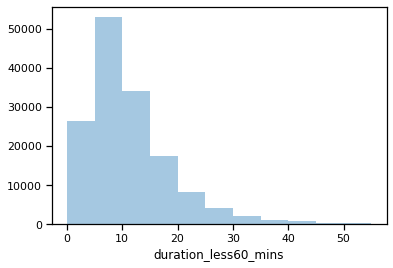

In [22]:
#lets check riders that rode for less than 1 hour


#create the bin range
bins = np.arange(0, 60, 5)
# Create a distplot 
sb.distplot(mins,
             kde=False,
             bins=bins)

# Display the plot
plt.show();

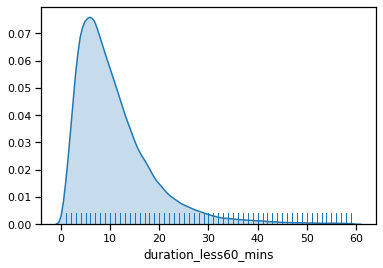

In [23]:
#another look at duration in minutes
#create distplot without histogram and use a rugplot
sb.distplot(mins,
            hist=False,
            rug=True,
            kde_kws={'shade':True})

#display the plot           
plt.show();

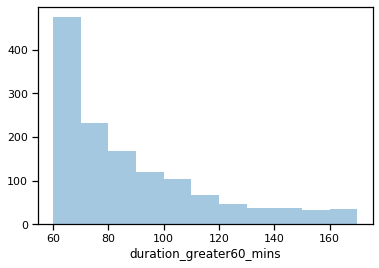

In [24]:
#Now , lets look at number of riders who rode more than 1 hour

#create the bin range
bins = np.arange(60, 180, 10)
# Create a distplot 
sb.distplot(hours,
             kde=False,
             bins=bins)

# Display the plot
plt.show();

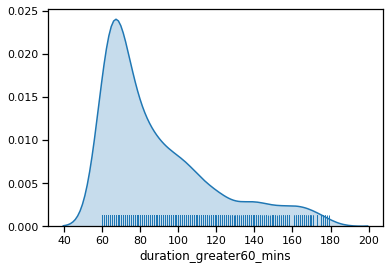

In [25]:
#another look at duration in hours
#create distplot without histogram and use a rugplot
sb.distplot(hours,
            hist=False,
            rug=True,
            kde_kws={'shade':True})

#display the plot           
plt.show();

**plotting the minutes and hours side by side and look at the median and mean for both**

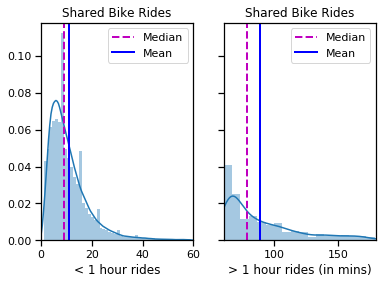

In [26]:
#set the mean and median to variables to be used in the plot
mins_mean = mins.mean()
mins_median=mins.median()
hours_mean = hours.mean()
hours_median = hours.median()
# Create a figure and axes. 
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True)
sb.distplot(mins, ax=ax0)

# Customize the labels and limitsfor minutes length
ax0.set(xlabel="< 1 hour rides", xlim=(0,60), title="Shared Bike Rides")

# Add vertical lines for the median and mean for minutes
ax0.axvline(x=mins_median, color='m', label='Median', linestyle='--', linewidth=2)
ax0.axvline(x=mins_mean, color='b', label='Mean', linestyle='-', linewidth=2)

#create the hours subplot
sb.distplot(hours,ax=ax1)

#customize labels and limits for hours length
ax1.set(xlabel="> 1 hour rides (in mins)", xlim=(60,180), title="Shared Bike Rides")

# Add vertical lines for the median and mean for hours
ax1.axvline(x=hours_median, color='m', label='Median', linestyle='--', linewidth=2)
ax1.axvline(x=hours_mean, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax0.legend()
ax1.legend()

#display plots
plt.show()

**Lets look at the days of the week and weekend.  This shows how many rides on each day**

**the dow_order will be a variable to be used for all plots for correct order of days of week**

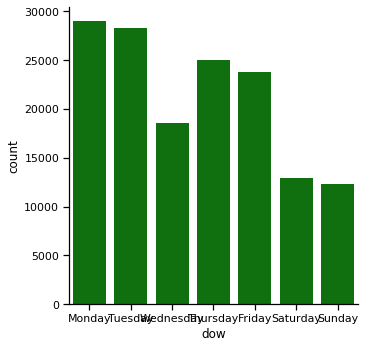

In [27]:

#create a countplot for days of week

sb.catplot(x='dow',data=df_bike_copy,kind='count',color='g',order=dow_order)
#display the plot
plt.show()
            

**now lets see actual weekend rider vs. weekday riders**

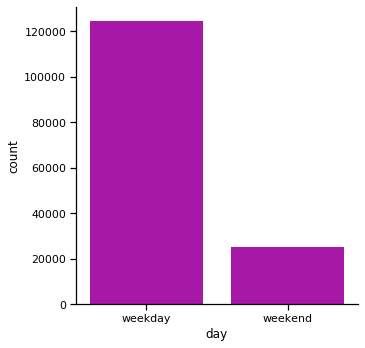

In [28]:

#countplot to compare
sb.catplot(x='day',data=df_bike_copy,kind='count',color='m')

#display plot
plt.show()


**lets examine user_type abd rental_access with countplots as well**

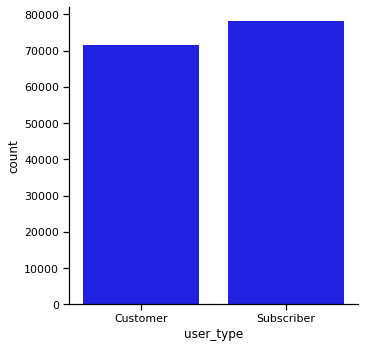

In [29]:
#countplot for user_types
sb.catplot(x='user_type',data=df_bike_copy,kind='count',color='b')
plt.show()

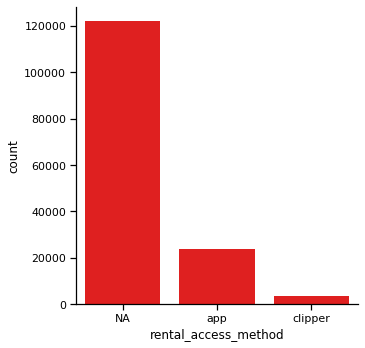

In [30]:
sb.catplot(x='rental_access_method',data=df_bike_copy,kind='count',color='r')
plt.show()

## Findings for length of rides based on minutes and hours.

**The distibution is skewed ot the right signifying the mean is greater than the median which it is as shown above in the plot.  In addition we can see the average ride is about 14 minutes while the middle more occurring number is between 8-10 minutes.  As far the hour riders  the mean is about 3 hours while the majority of riders is approximately between 1 and 2 hours.
<br> It will be interesting to compare length of rides for days of week**


###  Any unusual distributions? Operations on the data to tidy, adjust, or change the form of the data.

**I decided to breakdown the duration in seconds to minutes and hours(still in minute, so >=60).  This will give a cleaner look at the data to see length of ride for most riders.  There were some outliers in the hours column and this could be for a number of reasons. Longer rentals, forgot to turn in, etc... As expected in the minutes column the average ride was around 10 minutes.  THis could be people commuting to work for example.  
<br>In addition, I changed the date/time to a date/timestamp inorder to access day of week. Right off the bat I am surprised that the number of weekend riders is the lowest(about 25,000 weekend riders compared to 125,000 weekday riders) and that Monday and TUesday had the greatest number of drivers. Also, it appears that customers(those who just rent) and subscribers(those who are members are farily equal.  It will be interesting to see whose rides are longer.  The rental access method.  Seems that not many people are using the local clipper card.  Why so many Not Available?(possibly not collecting  that data or it could be optional).  Still interested to see the length of rides and days comparing the app users to the clipper**

## Bivariate Exploration

### Lets see the relationships between the day of week and the length of rides for riders that rode less than 1 hour and over 1 hour.  Also, I would like to see how the length of time compares for customers vs. subscribers as well as app users vs clipper users when renting their bike. In addition, I am looking at the number rider who rode more than 60 minutes compares with those who rode less than 60 minutes

**less than 60 minutes  vs.  greater than 60 minutes.   What a difference - There are 148,442 riders that rode for less
than 60 minutes compared with 1,373 riders who rode for more than 60 minutes.**

In [31]:
#get the counts
df_bike_copy['ride_time'].value_counts()

<60 Mins    148442
>60 Mins      1373
Name: ride_time, dtype: int64

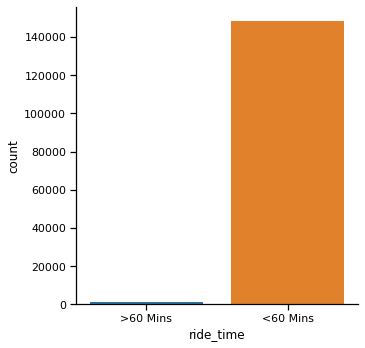

In [32]:
#create the countplot to compare >60 minute riders to <60 minute riders
sb.catplot(x='ride_time',data=df_bike_copy,kind='count')
plt.show()




**a boxplot to show spread of riders who rode <60 minutes**

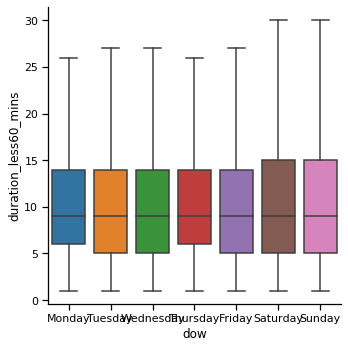

In [33]:
#create a boxplot to show time vs. day of week for riders riding less than 1 hour
#dow_order was created above and will reuse here


#removing outliers with sym as the majority of riders are less than 30 minutes

sb.catplot(x='dow',y='duration_less60_mins',data=df_mins,kind='box',order=dow_order,sym='')

#display plot
plt.show()

**a boxplot to show spread of riders with >60 minutes for each day**

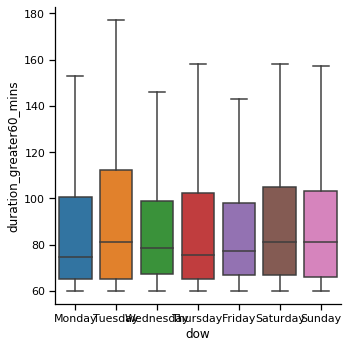

In [34]:
#create a boxplot to show time vs. day of week for riders riding more than 1 hour
#dow_order was created above and will reuse here

#getting rid of hours that are greate than 10 as my analysis is daily rides and the outliers are not reasonable as
#they could have been people that just held onto bike.  10 hours can possibly be a day ride.


sb.catplot(x='dow',y='duration_greater60_mins',data=df_hours,kind='box',order=dow_order,sym='')

#display plot
plt.show()

**compare the duration of rides between customers and subscribers with a pointplot**

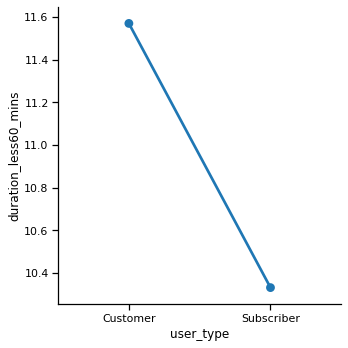

In [35]:
#create a point plot for duration in minutes
sb.catplot(x='user_type',y='duration_less60_mins',data=df_mins,kind='point',ci=None)

#display
plt.show()

**compare riders who rode >60 minutes using a pointplot. **

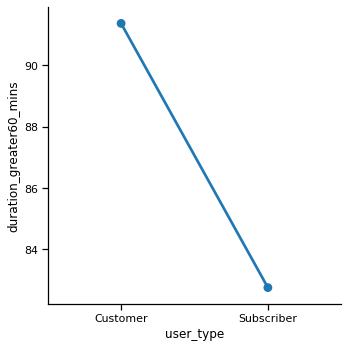

In [36]:
#create point plot for duration in hours
sb.catplot(x='user_type',y='duration_greater60_mins',data=df_hours,kind='point',ci=None)

#display
plt.show()

**compare the rental_access_method -  an app vs clipper vs Not Available - bay wheels only marked the app and clipper in their rental_access, however, after further research they have kiosks as their third rental type, so I believe these are one time rides using a debit/credit card**

**riders who rode <60 minutes**

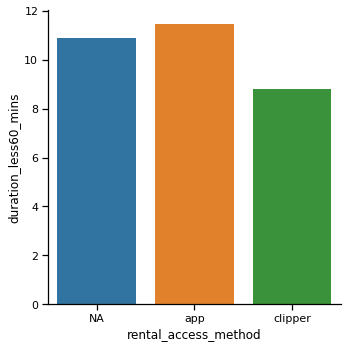

In [37]:
#create a bar plot for the mean in minutes
sb.catplot(x='rental_access_method',y='duration_less60_mins',data=df_mins,ci=None,kind='bar')

#display
plt.show()

**riders who rode > 60 minutes**

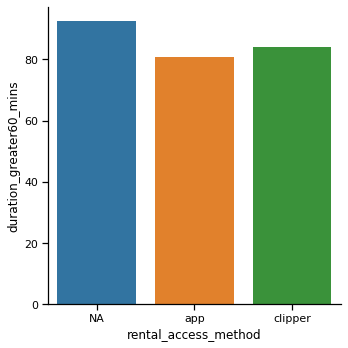

In [38]:
#create bar plot showing mean rides in hours for rental_access_method
#using the frame time created above, again this  is hours > 0 and less than 11
sb.catplot(x='rental_access_method',y='duration_greater60_mins',data=df_hours,ci=None,kind='bar')

#display
plt.show()

###  Relationships  observed in this part of the investigation. Did features of interest vary?

**As expected the weekend had the longest rides as long as the ride was less than 1 hour.  THe weekend also had the biggest spread.  On longer rides (greater or equal to 1 hour)  monday, tuesday, thursday and saturday were about the same with the 75th percentil being 2 hours.  Wed, friday and sunday only had 1 hour rides with a few outliers ofcourse.  Very surprised that the weekend didn't have longer rides , especially sunday with the most rides being 1 hour which was the median for all the days.**

###  Interesting relationships between the other features 

**I was very surprised with the difference in duration of rides between customers and subscribers.  Customers rode longer and I thought it would have been the opposite. Note:  It appears one needs an app (lyft or bay wheels) or a clipper card to take out a bike.  After further research it appears there are kiosks around town and one can use a debit/credit card.  These are the only three ways to rent a bike according to their website
<br>It appears tha average minutes are higher for people checking out with an app as opposed to the local clipper card. On longer rides clipper and app are about the same with what I beleive to be kiosk rentals are highest**

## Multivariate Exploration

**compare the days of week with duration and if user is a customer or a subsciber.  In addition, I will compare the dow, duration and the rental_access_method**

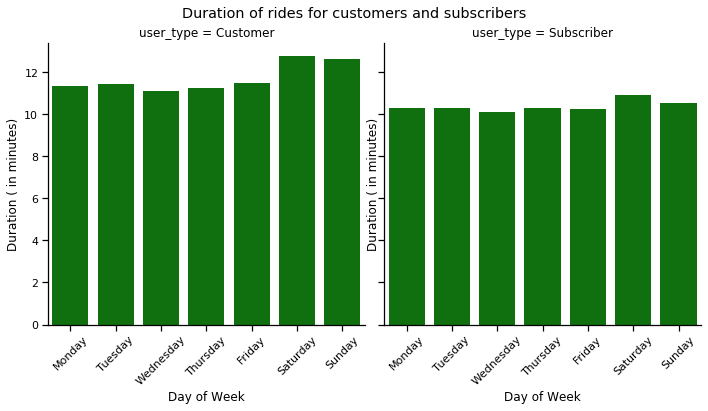

In [39]:
#create a barchart for each user - customer and subscriber
#using dow_order created above for correct order of days
g=sb.catplot(x='dow',y='duration_less60_mins',data=df_mins,kind='bar',
             ci=None,order=dow_order,col='user_type',color='g')
#title and axis labels
g.fig.suptitle("Duration of rides for customers and subscribers",y=1.02)
g.set(xlabel="Day of Week",
      ylabel="Duration ( in minutes)")

#rotate the days of week to fit better
g.set_xticklabels(rotation=45)
#display
plt.show()


**comparing subscribers and customers in hours ride time**

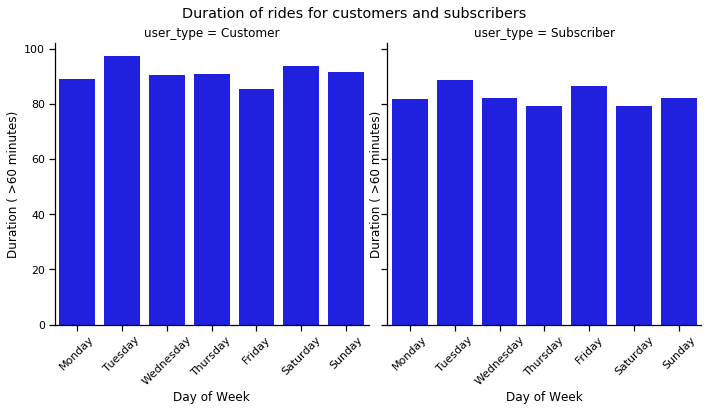

In [40]:
#create a barchart for each user - customer and subscriber for hours
#using dow_order created above for correct order of days and the time frame for hours > 0 and less than 11
g=sb.catplot(x='dow',y='duration_greater60_mins',data=df_hours,kind='bar',
             ci=None,order=dow_order,col='user_type',color='b')
#title and axis labels
g.fig.suptitle("Duration of rides for customers and subscribers",y=1.02)
g.set(xlabel="Day of Week",
      ylabel="Duration ( >60 minutes)")

#rotate the days of week to fit better
g.set_xticklabels(rotation=45)
#display
plt.show()


**a clustered bar chart comparing customer vs subscriber rides for <60 minutes**

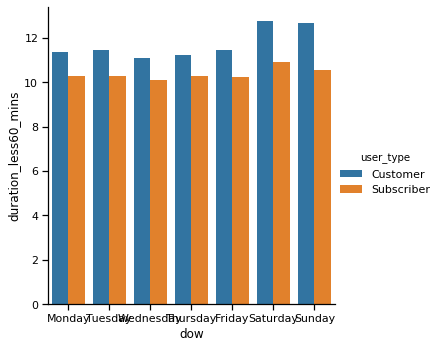

In [41]:

sb.catplot(x='dow',y='duration_less60_mins',data=df_mins,kind='bar',order=dow_order,ci=None,hue='user_type')
plt.show();

**clustered bar chart comparing customers vs. subscribers for riders >60 minutes and as expected longer rides are on the weekends for riders who ride >60 minutes**

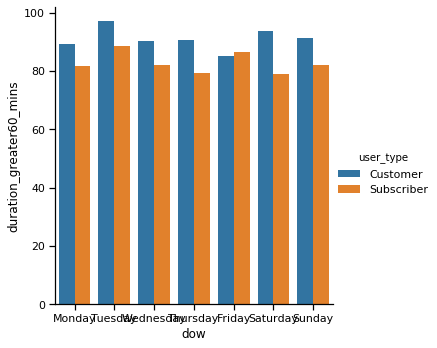

In [42]:
#lets see what hours duration looks like between customers and subscribers
sb.catplot(x='dow',y='duration_greater60_mins',data=df_hours,kind='bar',order=dow_order,ci=None,hue='user_type')
#display
plt.show()

**clustered bar chart for rental_access for rides in minutes**

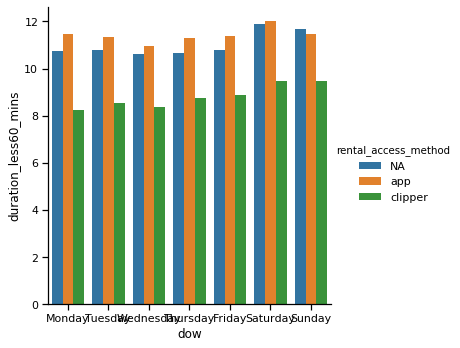

In [43]:
#create bar plot
sb.catplot(x='dow',y='duration_less60_mins',data=df_mins,kind='bar',order=dow_order,ci=None,hue='rental_access_method')
          

#display
plt.show()

**clustered bar chart for rental_access in hours**

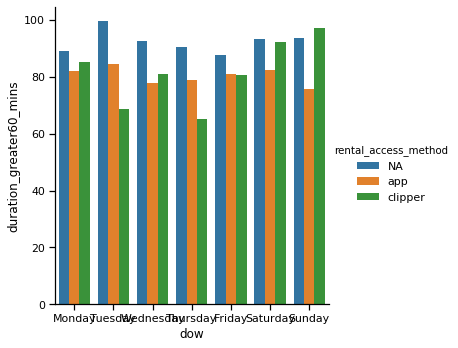

In [44]:
#create grouped barplot
sb.catplot(x='dow',y='duration_greater60_mins',data=df_hours,kind='bar',order=dow_order,ci=None,hue='rental_access_method')
#display
plt.show()

### Relationships  observed in this part of the investigation. Any features that strengthened each other

**On a whole, customers ride longer than subscibers.  As expected the longest rides on a whole is the weekend.  THere is big difference on rides > 60 minutes between subscribers and customers everyday but especially on the weekends. One possible reason is the customers can be tourists riding to explore the city.  The data set was in December indicating a large tourist month with the holidays.  Riders with the clipper card typically rode less than the other rental methods for <60 minute rides but did much better on longer rides , especially the weekends.**
###  Any interesting or surprising interactions between features?

**Very surprising that the riders with a clipper card had such long rides on the weekend. I would think if you like to ride distance you would have your own bike, while the share bikes are typically around town. I would think the local would make more use of the bike share system using the clipper card, but it doesn't seem that way.  Cost might be a factor here.  Or maybe, mostly tourists use the bike share. Why is Tuesday the longest ride of the week?  That stood out.  But, again, probably a tourist riding around, getting lunch, etc.  before docking the bike is a possible explanation.  Also, surprised customers are riding longer than subscribers as it costs an extra $3 for each 15 minutes after 30 minutes for customers and 45 minutes for subscribers.  Again, my guess is tourists**